<a href="https://colab.research.google.com/github/dev-researcher/automatas/blob/main/Clase_3_RETO_NFAEpsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1
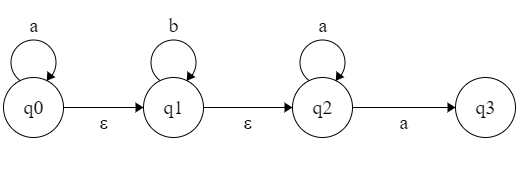

In [ ]:
class NFAEpsilon:
    def __init__(self, Q, Sigma, delta, Q0, F):
        """
        Inicializa un autómata no determinista con transiciones epsilon (NFA-ε).

        Args:
            Q (set): Conjunto de estados del autómata.
            Sigma (set): Conjunto del alfabeto.
            delta (dict): Función de transición, mapeo de (estado, símbolo) a conjunto de estados.
            Q0 (set): Conjunto de estados iniciales.
            F (set): Conjunto de estados finales.
        """
        self.Q = Q  # Conjunto de estados
        self.Sigma = Sigma  # Alfabeto
        self.delta = delta  # Función de transición
        self.Q0 = Q0  # Conjunto de estados iniciales
        self.F = F  # Conjunto de estados finales

    def epsilon_closure(self, states):
        """
        Calcula el cierre epsilon de un conjunto de estados.

        Args:
            states (set): Conjunto de estados del que se calculará el cierre epsilon.

        Returns:
            set: Conjunto de estados que incluye todos los estados alcanzables a través de transiciones epsilon.
        """
        stack = list(states)  # Usa una pila para el cálculo del cierre
        closure = set(states)  # Inicializa el conjunto de cierre con los estados dados
        while stack:
            state = stack.pop()  # Extrae un estado de la pila
            for next_state in self.delta.get((state, 'ε'), []):  # Obtiene los estados alcanzables mediante transiciones epsilon
                if next_state not in closure:
                    closure.add(next_state)  # Agrega el nuevo estado al cierre
                    stack.append(next_state)  # Agrega el nuevo estado a la pila para explorar más transiciones
        return closure

    def accepts(self, input_string):
        """
        Determina si una cadena de entrada es aceptada por el NFA-ε.

        Args:
            input_string (str): Cadena de entrada para procesar con el autómata.

        Returns:
            bool: True si la cadena es aceptada, False en caso contrario.
        """
        current_states = self.epsilon_closure(self.Q0)  # Calcula el cierre epsilon de los estados iniciales
        for symbol in input_string:
            next_states = set()
            # Para cada estado actual, obtiene los estados alcanzables con el símbolo dado
            for state in current_states:
                next_states.update(self.delta.get((state, symbol), []))
            # Calcula el cierre epsilon de los estados alcanzables
            current_states = self.epsilon_closure(next_states)
        # Verifica si alguno de los estados finales es alcanzable
        return any(state in self.F for state in current_states)

# Definición del NFA-Epsilon
Q = {'q0', 'q1', 'q2', 'q3'}  # Conjunto de estados
Sigma = {'a', 'b'}  # Alfabeto
delta = {
    ('q0', 'a'): {'q0'},  # Transiciones desde q0 con 'a' llevan a q0
    ('q0', 'ε'): {'q1'},  # Transiciones epsilon desde q0 llevan a q1
    ('q1', 'b'): {'q1'},  # Transiciones desde q1 con 'b' llevan a q1
    ('q1', 'ε'): {'q2'},  # Transiciones epsilon desde q1 llevan a q2
    ('q2', 'a'): {'q2', 'q3'}  # Transiciones desde q2 con 'a' llevan a q2 y q3
}
Q0 = {'q0'}  # Estado inicial
F = {'q3'}  # Estado final

# Crear el autómata
nfa_epsilon = NFAEpsilon(Q, Sigma, delta, Q0, F)

# Ejemplos de uso
input_string = "aaaba"
print(f"La cadena '{input_string}' es aceptada: {nfa_epsilon.accepts(input_string)}")  # Verifica si la cadena 'aaab' es aceptada

input_string = "aabaaa"
print(f"La cadena '{input_string}' es aceptada: {nfa_epsilon.accepts(input_string)}")  # Verifica si la cadena 'aabaaa' es aceptada

input_string = "ba"
print(f"La cadena '{input_string}' es aceptada: {nfa_epsilon.accepts(input_string)}")  # Verifica si la cadena 'aabaaa' es aceptada

La cadena 'aaaba' es aceptada: True
La cadena 'aabaaa' es aceptada: True
La cadena 'ba' es aceptada: True



##2

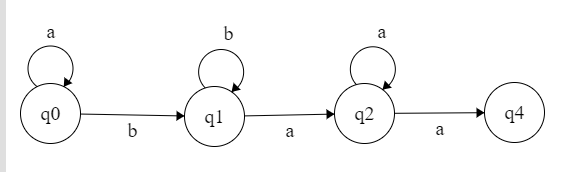

In [ ]:
class NFA:
    def __init__(self, Q, Sigma, delta, Q0, F):
        """
        Inicializa un autómata no determinista (NFA).

        Args:
            Q (set): Conjunto de estados del autómata.
            Sigma (set): Conjunto del alfabeto.
            delta (dict): Función de transición, mapeo de (estado, símbolo) a conjunto de estados.
            Q0 (set): Conjunto de estados iniciales.
            F (set): Conjunto de estados finales.
        """
        self.Q = Q  # Conjunto de estados
        self.Sigma = Sigma  # Alfabeto
        self.delta = delta  # Función de transición
        self.Q0 = Q0  # Conjunto de estados iniciales
        self.F = F  # Conjunto de estados finales

    def accepts(self, input_string):
        """
        Determina si una cadena de entrada es aceptada por el NFA.

        Args:
            input_string (str): Cadena de entrada para procesar con el autómata.

        Returns:
            bool: True si la cadena es aceptada, False en caso contrario.
        """
        current_states = set(self.Q0)  # Inicializa el conjunto de estados actuales con los estados iniciales
        for symbol in input_string:
            next_states = set()
            # Para cada estado actual, obtiene los estados alcanzables con el símbolo dado
            for state in current_states:
                next_states.update(self.delta.get((state, symbol), []))
            # Actualiza el conjunto de estados actuales con los estados alcanzables
            current_states = next_states
        # Verifica si alguno de los estados finales es alcanzable
        return any(state in self.F for state in current_states)

# Definición del NFA
Q = {'q0', 'q1', 'q2', 'q3', 'q4'}  # Conjunto de estados
Sigma = {'a', 'b'}  # Alfabeto
delta = {
    ('q0', 'a'): {'q0'},  # Transiciones desde q0 con 'a' llevan a q0
    ('q0', 'b'): {'q1'},  # Transiciones desde q0 con 'b' llevan a q1
    ('q1', 'b'): {'q1'},  # Transiciones desde q1 con 'b' llevan a q1
    ('q1', 'a'): {'q2'},  # Transiciones desde q1 con 'a' llevan a q2
    ('q2', 'a'): {'q2', 'q4'}  # Transiciones desde q2 con 'a' llevan a q2 y q4
}
Q0 = {'q0'}  # Estado inicial
F = {'q4'}  # Estado final

# Crear el autómata
nfa = NFA(Q, Sigma, delta, Q0, F)

# Ejemplos de uso
input_string = "aaab"
print(f"La cadena '{input_string}' es aceptada: {nfa.accepts(input_string)}")  # Verifica si la cadena 'aaab' es aceptada

input_string = "aaaaaabaaa"
print(f"La cadena '{input_string}' es aceptada: {nfa.accepts(input_string)}")  # Verifica si la cadena 'aaaaaabaaa' es aceptada


La cadena 'aaab' es aceptada: False
La cadena 'aaaaaabaaa' es aceptada: True


In [ ]:
print('asdfasfasdfa')

asdfasfasdfa


#3

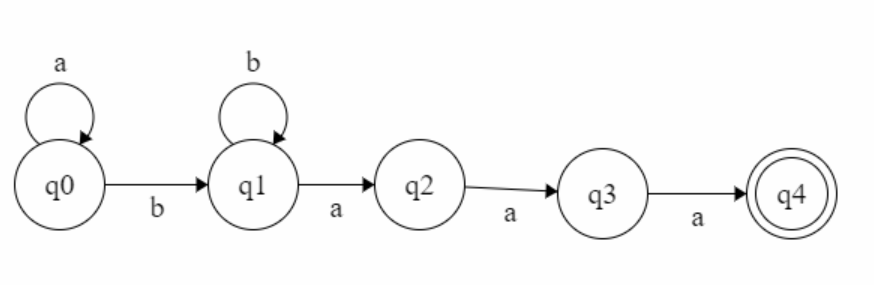

In [ ]:
class DFA:
    def __init__(self, Q, Sigma, delta, q0, F):
        self.Q = Q  # Conjunto de estados
        self.Sigma = Sigma  # Alfabeto
        self.delta = delta  # Función de transición
        self.q0 = q0  # Estado inicial
        self.F = F  # Conjunto de estados finales

    def delta_hat(self, state, symbol):
        """
        Aplica la función de transición δ sobre un estado y un símbolo.

        Args:
            state (str): Estado actual del autómata.
            symbol (str): Símbolo del alfabeto a procesar.

        Returns:
            str or None: El siguiente estado después de aplicar la transición,
                         o None si no hay transición definida.
        """
        if state in self.Q and symbol in self.Sigma:
            return self.delta.get((state, symbol))
        return None

    def accepts(self, input_string):
        """
        Determina si la cadena de entrada es aceptada por el autómata.

        Args:
            input_string (str): Cadena de entrada compuesta por símbolos del alfabeto.

        Returns:
            bool: True si la cadena es aceptada (termina en un estado final), False en caso contrario.
        """
        current_state = self.q0
        for symbol in input_string:
            current_state = self.delta_hat(current_state, symbol)
            if current_state is None:
                return False
        return current_state in self.F

# Definición del DFA para a*b*a*a
Q = {'q0', 'q1', 'q2', 'q3', 'q4', 'q5'}
Sigma = {'a', 'b'}
delta = {
    ('q0', 'a'): 'q0',
    ('q0', 'b'): 'q1',
    ('q1', 'b'): 'q1',
    ('q1', 'a'): 'q2',
    ('q2', 'a'): 'q3',
    ('q3', 'a'): 'q4',
}
q0 = 'q0'
F = {'q4'}

dfa = DFA(Q, Sigma, delta, q0, F)

# Ejemplo de prueba
print(dfa.accepts("aaabbaa"))  # True
print(dfa.accepts("bba"))  # False



False
False
